# Import required Libraries

In [1]:
import pandas as pd
import numpy as np

# Visualiation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Mount to google drive to extract Dataset

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
main_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predictive Analytics_colab/Project_1/heart_attack_prediction_dataset.csv')
main_df.shape

(8763, 26)

# Get the null  values count from each column

In [4]:
main_df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [5]:
main_df['Heart Attack Risk'].value_counts()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

# Drop Not required columns

In [6]:
main_df_v1 = main_df

l = ['Patient ID','Obesity','Sedentary Hours Per Day','Income','Country','Continent','Hemisphere']

In [7]:
for c in l:
    main_df_v1 = main_df_v1.drop([c],axis=1)

# Standardize columns remove special symbols and lowercase the column names

In [8]:

new_col_list = []

for c in main_df_v1.columns:
    c = c.lower()
    c = c.replace('(', "_")
    c = c.replace(')', "_")
    c = c.replace(' ', "_")
    new_col_list.append(c)

print(new_col_list)
print(f"OLD Columns = {main_df_v1.columns}")

main_df_v1.columns = new_col_list
print(f"New Columns = {main_df_v1.columns}")


['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes', 'family_history', 'smoking', 'alcohol_consumption', 'exercise_hours_per_week', 'diet', 'previous_heart_problems', 'medication_use', 'stress_level', 'bmi', 'triglycerides', 'physical_activity_days_per_week', 'sleep_hours_per_day', 'heart_attack_risk']
OLD Columns = Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk'],
      dtype='object')
New Columns = Index(['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'bmi', 't

# Split Blood Pressure into two differnet columns one is Systolic Pressure means before slash and Diastolic Pressure after slash

In [9]:


# new_df = new_df.assign(new_bp=lambda x: x['blood_pressure'].str.split('/'))

main_df_v1['systolic_mmHg_bp'] = main_df_v1['blood_pressure'].str.split('/').apply(lambda x: x[0] ).astype('int')
main_df_v1['diastolic_mmHg_bp'] = main_df_v1['blood_pressure'].str.split('/').apply(lambda x: x[1] ).astype('int')



# new_df['first'] = new_df.new_bp.apply(lambda x: x[0])


main_df_v1[['systolic_mmHg_bp','diastolic_mmHg_bp','blood_pressure']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   systolic_mmHg_bp   8763 non-null   int64 
 1   diastolic_mmHg_bp  8763 non-null   int64 
 2   blood_pressure     8763 non-null   object
dtypes: int64(2), object(1)
memory usage: 205.5+ KB


In [10]:
main_df_v1 = main_df_v1[['age', 'sex', 'cholesterol', 'blood_pressure','systolic_mmHg_bp','diastolic_mmHg_bp', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'bmi',
       'physical_activity_days_per_week', 'sleep_hours_per_day',
       'heart_attack_risk']]

In [11]:
main_df_v1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,8763.0,NaN,NaN,NaN,53.707977,21.249509,18.0,35.0,54.0,72.0,90.0
sex,8763,2,Male,6111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol,8763.0,NaN,NaN,NaN,259.877211,80.863276,120.0,192.0,259.0,330.0,400.0
blood_pressure,8763,3915,146/94,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
systolic_mmHg_bp,8763.0,NaN,NaN,NaN,135.075659,26.349976,90.0,112.0,135.0,158.0,180.0
diastolic_mmHg_bp,8763.0,NaN,NaN,NaN,85.156111,14.676565,60.0,72.0,85.0,98.0,110.0
heart_rate,8763.0,NaN,NaN,NaN,75.021682,20.550948,40.0,57.0,75.0,93.0,110.0
diabetes,8763.0,NaN,NaN,NaN,0.652288,0.476271,0.0,0.0,1.0,1.0,1.0
family_history,8763.0,NaN,NaN,NaN,0.492982,0.499979,0.0,0.0,0.0,1.0,1.0
smoking,8763.0,NaN,NaN,NaN,0.896839,0.304186,0.0,1.0,1.0,1.0,1.0


In [12]:
# Check for the duplicated values inside the dataset

main_df_v1[main_df_v1.duplicated()] # As there is no duplicated rows

,age,sex,cholesterol,blood_pressure,systolic_mmHg_bp,diastolic_mmHg_bp,heart_rate,diabetes,family_history,smoking,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,bmi,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk


# Visualization

## Heatmap

<ipython-input-13-413e91a56961>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(main_df_v1.corr(),annot=True,cmap='icefire')


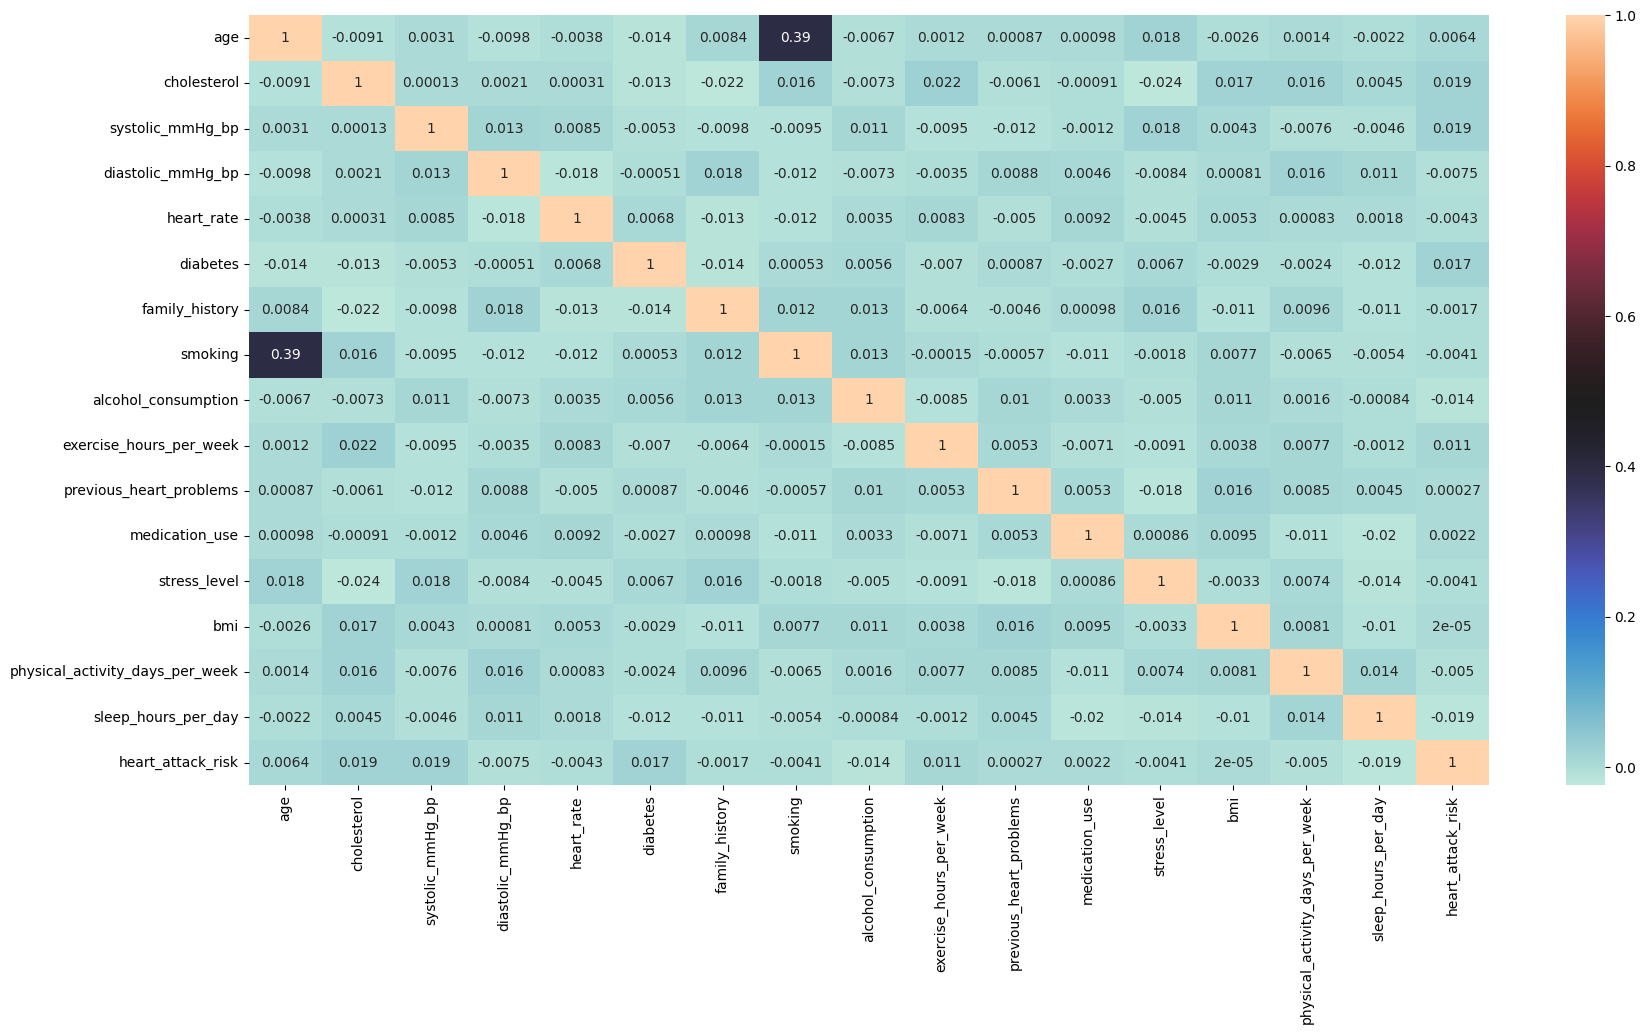

In [13]:
plt.figure(figsize=(20,10))

sns.heatmap(main_df_v1.corr(),annot=True,cmap='icefire')
plt.show()

## Q1 Is the Heart Attack risk high in the age between 40 to 50?

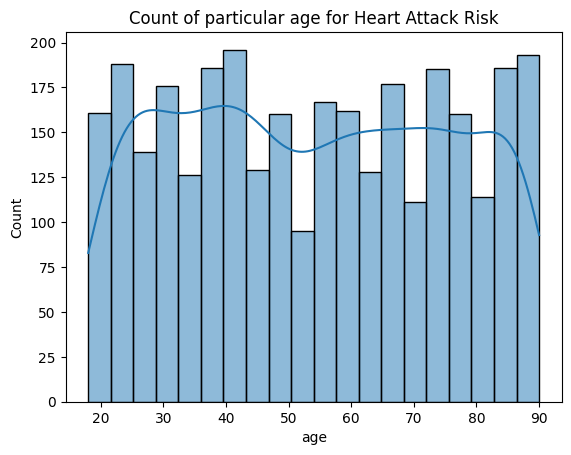

In [14]:

sns.histplot(main_df_v1[main_df_v1['heart_attack_risk']==1]['age'],kde=True,bins=20)
plt.title("Count of particular age for Heart Attack Risk")
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Predictive Analytics_colab/Project_1/Visualizations/age_with_risk.png")
plt.show()

## Q2 What is the count of diabetic patient if there is a unhealthy diet is that high then the another diet plans? And if there is a diabetes what is the minimum age?

In [15]:
main_df_v1['diet'].value_counts().keys().tolist()

['Healthy', 'Average', 'Unhealthy']

In [16]:
# sns.barplot(x='diet',y='diabetes', data=main_df_v1,palette=sns.color_palette('coolwarm', n_colors=3))
# sns.displot(main_df_v1['diet'],kde=True, bins=20)
diabetes_df = main_df_v1[main_df_v1['diabetes'] == 1]

Average = main_df_v1[(main_df_v1['diet'] == 'Average') & (main_df_v1['diabetes'] == 1)]['diabetes'].value_counts().to_list()[0]
Unhealthy = main_df_v1[(main_df_v1['diet'] == 'Unhealthy') & (main_df_v1['diabetes'] == 1)]['diabetes'].value_counts().to_list()[0]
Healthy = main_df_v1[(main_df_v1['diet'] == 'Healthy') & (main_df_v1['diabetes'] == 1)]['diabetes'].value_counts().to_list()[0]

print(f"Average = {Average}\nUnhealthy = {Unhealthy} \nHealthy = {Healthy}")

Average = 1896
Unhealthy = 1877 
Healthy = 1943


In [17]:
print(f"The Minimum age of diabetes is {min(diabetes_df['age'])}")



The Minimum age of diabetes is 18


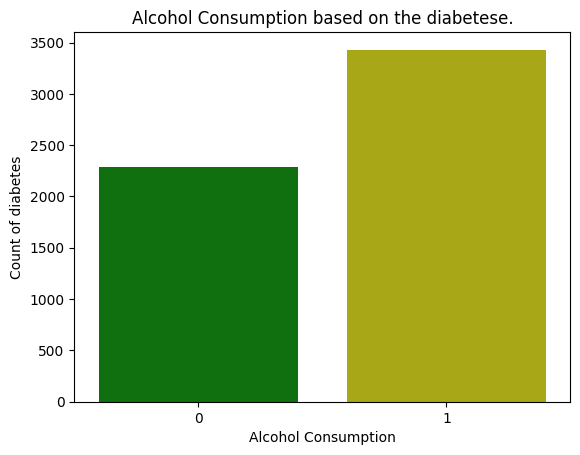

In [18]:
# If there is a diabetes what is the minimum age.
# sns.barplot(x='diet',y='exercise_hours_per_week', data=diabetes_df ,palette=sns.color_palette('coolwarm', n_colors=3))
# plt.figure(figsize=(10,6))
# sns.boxplot(x='diabetes', y = 'age', data=diabetes_df, hue='diet', palette=sns.color_palette('coolwarm', n_colors=3))
# plt.savefig("demo.png")



plt.title("Alcohol Consumption based on the diabetese.")
sns.countplot(diabetes_df, x="alcohol_consumption",palette = {0:'g',1:'y'})
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count of diabetes')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Predictive Analytics_colab/Project_1/Visualizations/diabetes_alcohol.png")

plt.show()

In [19]:
diabetes_df['diet'].value_counts()

Healthy      1943
Average      1896
Unhealthy    1877
Name: diet, dtype: int64

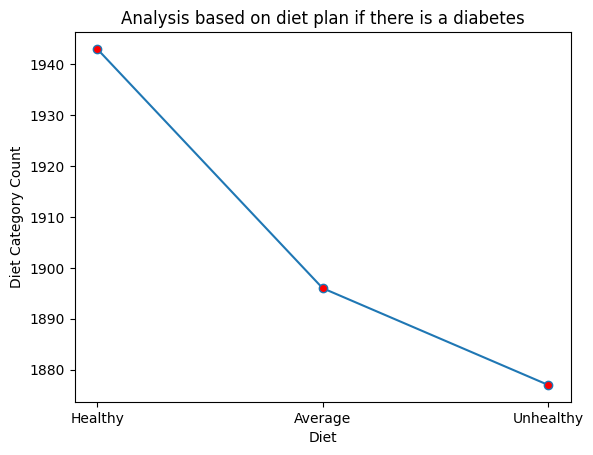

In [20]:
counts = diabetes_df['diet'].value_counts().tolist()
values = diabetes_df['diet'].value_counts().keys().tolist()
plt.plot(values,counts,label = 'Diet Categories',marker='o',markerfacecolor='red')
plt.xlabel('Diet')
plt.ylabel('Diet Category Count')
plt.title('Analysis based on diet plan if there is a diabetes')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Predictive Analytics_colab/Project_1/Visualizations/diabetes_diet.png")

plt.show()

# Q3 If there is no heart attack risk then what is the average exercise hours per week and maximum stress level?


In [21]:

no_risk_df = main_df_v1[main_df_v1['heart_attack_risk'] == 0]
# sorted(no_risk_df['stress_level'].unique())
# sorted(no_risk_df['exercise_hours_per_week'].unique())


stress_level = max(no_risk_df['stress_level'])
work_out_hours = min(no_risk_df['exercise_hours_per_week'])

print(f"Min work out hours per week = {work_out_hours}\nMaximum stress level = {stress_level}")

s = sum(no_risk_df['exercise_hours_per_week'])
l = len(no_risk_df['exercise_hours_per_week'])
avg = s/l
print(f"Average = {round(avg,2)}")
# no_risk_df['age'].value_counts()

Min work out hours per week = 0.0024423483189783
Maximum stress level = 10
Average = 9.97


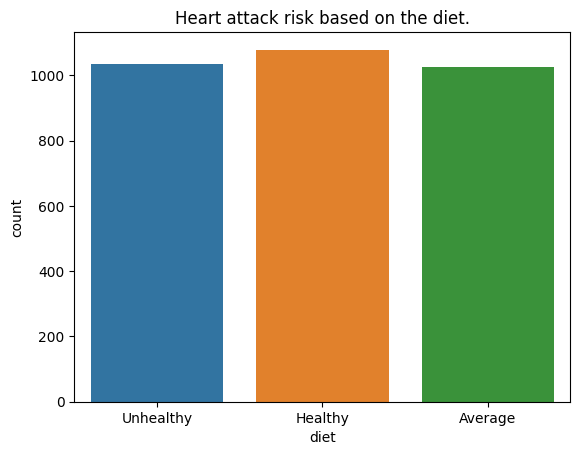

In [22]:
v = main_df_v1[main_df_v1['heart_attack_risk'] == 1]

# sns.barplot(x='sex',y='heart_attack_risk',data=v)
# sns.histplot(main_df_v1[main_df_v1['heart_attack_risk']==1]['diet'],kde=True,bins=15)
plt.title("Heart attack risk based on the diet.")
sns.countplot(main_df_v1[main_df_v1['heart_attack_risk']==1], x="diet",)
plt.show()

In [23]:

diet_count = main_df.Diet.value_counts()

diet_list = main_df.Diet.value_counts().reset_index()

# print(diet_list)
fig = px.pie(diet_list
             , values = diet_count
             ,names = 'index'
             ,color_discrete_sequence = px.colors.sequential.Bluered_r
             , height = 500
             ,width = 600)

fig.update_traces(marker_line_color = 'green', marker_line_width = 2.5)

fig.show()

# Q4 What is the count of alcohol consumption when there is a diabetese?

In [24]:
# diabetes_df[diabetes_df['alcohol_consumption']==1].shape[0]
diabetes_df['alcohol_consumption'].value_counts()

1    3430
0    2286
Name: alcohol_consumption, dtype: int64

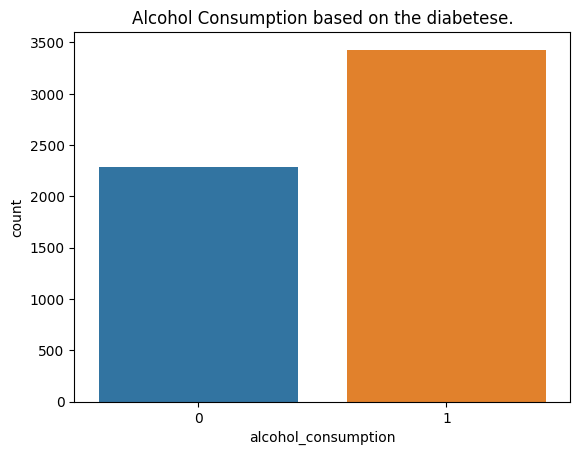

In [25]:

plt.title("Alcohol Consumption based on the diabetese.")
sns.countplot(diabetes_df, x="alcohol_consumption")
plt.show()

## Visualization Based on SEX with heart attack risk

In [26]:
main_df_v1['sex'].value_counts()

Male      6111
Female    2652
Name: sex, dtype: int64

In [27]:
main_df_v1['heart_attack_risk'].value_counts()


0    5624
1    3139
Name: heart_attack_risk, dtype: int64

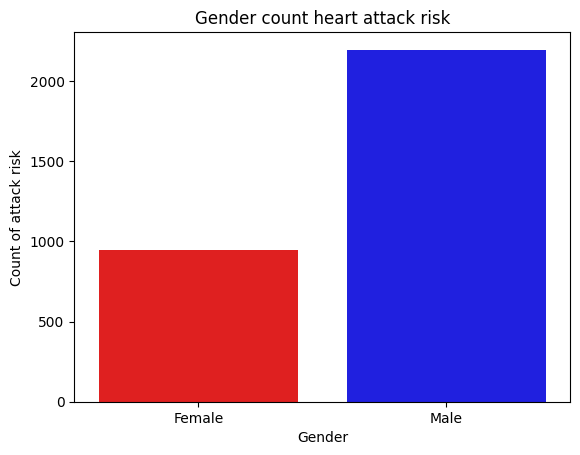

In [28]:
sex_df = main_df_v1[main_df_v1['heart_attack_risk'] == 1]
sns.countplot(sex_df, x="sex",palette = {'Male':'b','Female':'r'})
plt.xlabel('Gender')
plt.ylabel('Count of attack risk')
plt.title("Gender count heart attack risk")
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Predictive Analytics_colab/Project_1/Visualizations/sex_risk_count.png")

plt.show()
## According to the observation we can clearly see that the count of Male is more than the Female Heart Attack Risk

In [29]:
print(main_df_v1[['heart_attack_risk','sex']].groupby(by =['sex']).count())
print(main_df_v1['sex'].unique())

        heart_attack_risk
sex                      
Female               2652
Male                 6111
['Male' 'Female']


In [30]:
main_df_v1['heart_attack_risk'].value_counts()

0    5624
1    3139
Name: heart_attack_risk, dtype: int64

In [31]:
main_df_v1[main_df_v1['heart_attack_risk']==1].sex.value_counts()

Male      2195
Female     944
Name: sex, dtype: int64

## Gender count based on heart attack risk

In [32]:

attack_risk = main_df_v1[main_df_v1['heart_attack_risk']==1]

gender_percentage = (attack_risk.sex.value_counts()/attack_risk.sex.value_counts().sum())*100
sex_list = attack_risk.sex.value_counts().reset_index()


fig = px.pie(sex_list
             , values = gender_percentage
             ,names = 'index'
             ,color_discrete_sequence = px.colors.sequential.Bluered_r
             , height = 500
             ,width = 600)

fig.update_traces(marker_line_color = 'green', marker_line_width = 2.5)

fig.show()

In [33]:


diet_count = main_df.Diet.value_counts()

diet_list = main_df.Diet.value_counts().reset_index()

# print(diet_list)
fig = px.pie(diet_list
             , values = diet_count
             ,names = 'index'
             ,color_discrete_sequence = px.colors.sequential.Bluered_r
             , height = 500
             ,width = 600)

fig.update_traces(marker_line_color = 'green', marker_line_width = 2.5)

fig.show()

In [34]:
diet_list.columns = ['Diet','diet_count']
diet_list

,Diet,diet_count
0,Healthy,2960
1,Average,2912
2,Unhealthy,2891


In [35]:
fig = px.bar(
    diet_list
    ,x = 'Diet'
    ,y = 'diet_count'
    ,color = 'Diet'
    ,labels = {'diet_count':  'Count as per each diet category'}
    ,color_continuous_scale = 'viridis'
    ,text_auto = True
    ,title = 'Diet category count based on heart attack risk'
)

fig.update_traces(marker_line_color = 'yellow',marker_line_width=3)
fig.show()

## Check for the number of unique values in each columns

In [36]:
main_df_v1.nunique()

age                                  73
sex                                   2
cholesterol                         281
blood_pressure                     3915
systolic_mmHg_bp                     91
diastolic_mmHg_bp                    51
heart_rate                           71
diabetes                              2
family_history                        2
smoking                               2
alcohol_consumption                   2
exercise_hours_per_week            8763
diet                                  3
previous_heart_problems               2
medication_use                        2
stress_level                         10
bmi                                8763
physical_activity_days_per_week       8
sleep_hours_per_day                   7
heart_attack_risk                     2
dtype: int64

In [37]:
main_df_v1.head()

,age,sex,cholesterol,blood_pressure,systolic_mmHg_bp,diastolic_mmHg_bp,heart_rate,diabetes,family_history,smoking,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,bmi,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk
0,67,Male,208,158/88,158,88,72,0,0,1,0,4.168189,Average,0,0,9,31.251233,0,6,0
1,21,Male,389,165/93,165,93,98,1,1,1,1,1.813242,Unhealthy,1,0,1,27.194973,1,7,0
2,21,Female,324,174/99,174,99,72,1,0,0,0,2.078353,Healthy,1,1,9,28.176571,4,4,0
3,84,Male,383,163/100,163,100,73,1,1,1,1,9.828130,Average,1,0,9,36.464704,3,4,0
4,66,Male,318,91/88,91,88,93,1,1,1,0,5.804299,Unhealthy,1,0,6,21.809144,1,5,0


## Check the outliers

### Age

In [38]:
fig = px.box(data_frame = main_df_v1, x = 'age')
fig.show()

### cholesterol

In [39]:
px.box(data_frame = main_df_v1, x = 'cholesterol')


### heart_rate

In [40]:
px.box(data_frame = main_df_v1, x = 'heart_rate')

# Implement Models

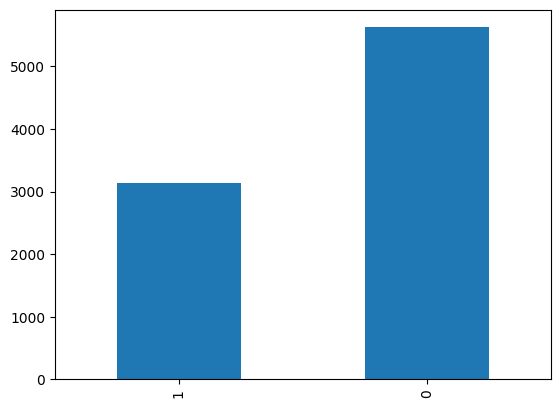

In [41]:

main_df_v1['heart_attack_risk'].value_counts().sort_values().plot(kind='bar')
plt.show()

## Ordinal Encoder for chatagorical values

In [42]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


oe = OrdinalEncoder()


main_df_v1['diet'] = oe.fit_transform(main_df_v1[['diet']])
main_df_v1['sex'] = oe.fit_transform(main_df_v1[['sex']])
main_df_v1['blood_pressure'] = oe.fit_transform(main_df_v1[['blood_pressure']])





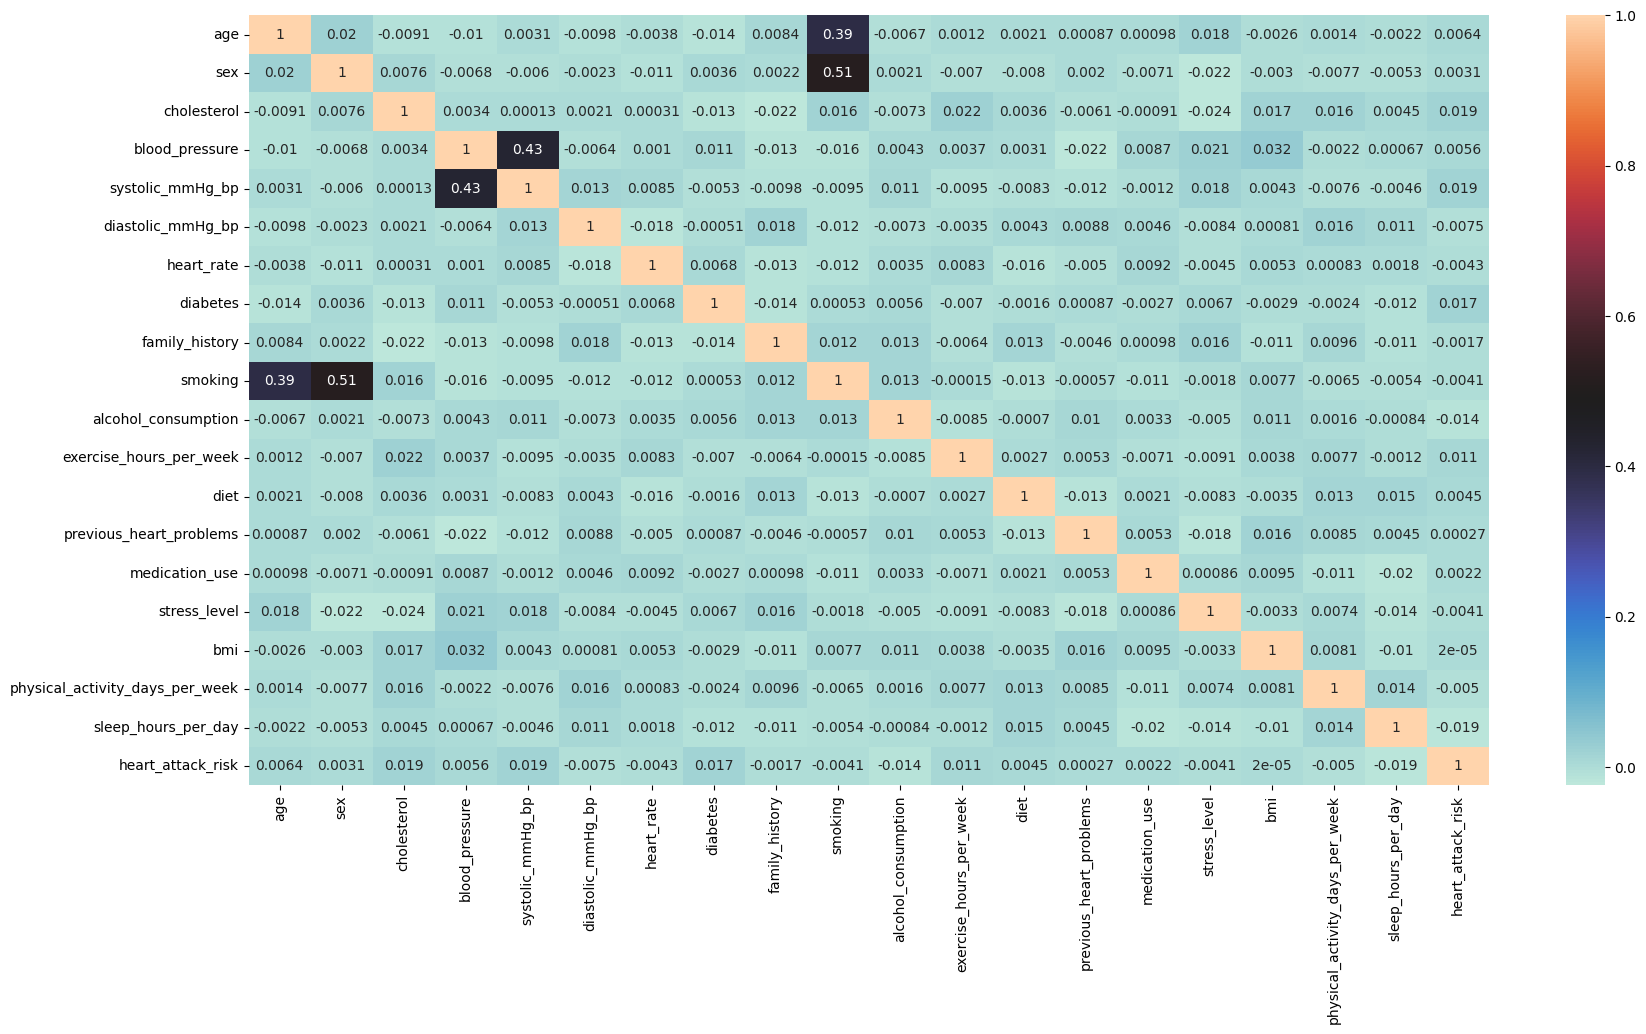

In [43]:
# Check for the correlation after labeling

plt.figure(figsize=(20,10))

sns.heatmap(main_df_v1.corr(),annot=True,cmap='icefire')
plt.show()

In [44]:
main_df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8763 non-null   int64  
 1   sex                              8763 non-null   float64
 2   cholesterol                      8763 non-null   int64  
 3   blood_pressure                   8763 non-null   float64
 4   systolic_mmHg_bp                 8763 non-null   int64  
 5   diastolic_mmHg_bp                8763 non-null   int64  
 6   heart_rate                       8763 non-null   int64  
 7   diabetes                         8763 non-null   int64  
 8   family_history                   8763 non-null   int64  
 9   smoking                          8763 non-null   int64  
 10  alcohol_consumption              8763 non-null   int64  
 11  exercise_hours_per_week          8763 non-null   float64
 12  diet                

## Split X,y

In [45]:
# X = main_df_v1.drop(['sex','heart_attack_risk'], axis=1)

X = main_df_v1[['cholesterol', 'blood_pressure', 'heart_rate', 'diabetes',\
       'family_history', 'smoking', 'alcohol_consumption', \
       'exercise_hours_per_week', 'diet', 'previous_heart_problems', \
       'medication_use', 'stress_level', 'bmi']]


y = main_df_v1['heart_attack_risk']

len(X.columns)


13

## Scale the data using Satandard Scaler

In [46]:
X = StandardScaler().fit_transform(X)
X

array([[-6.41578894e-01,  4.99532925e-01, -1.47042098e-01, ...,
        -9.96696089e-01,  1.23460354e+00,  3.73453677e-01],
       [ 1.59689495e+00,  7.69352512e-01,  1.11817855e+00, ...,
        -9.96696089e-01, -1.56312876e+00, -2.68479292e-01],
       [ 7.93023127e-01,  1.13117616e+00, -1.47042098e-01, ...,
         1.00331486e+00,  1.23460354e+00, -1.13134273e-01],
       ...,
       [-1.22154025e-01,  6.00383525e-01,  1.45881488e+00, ...,
        -9.96696089e-01, -1.64262612e-01,  1.03099938e+00],
       [-1.01259666e+00, -9.79609207e-01, -7.30990089e-01, ...,
         1.00331486e+00, -1.64262612e-01, -2.52804415e-01],
       [ 1.18877541e+00, -2.72770354e-01, -1.05510022e-03, ...,
        -9.96696089e-01,  8.84886999e-01,  6.36622738e-01]])

## Split the data into train and test & import required Models
- Apply Principal Component Analysis

array([0.08195305, 0.08109327, 0.07962568, 0.07905341, 0.0782678 ,
       0.07727167, 0.07676613, 0.07645144, 0.0755442 , 0.07454841,
       0.07366212, 0.07332618, 0.07243664])

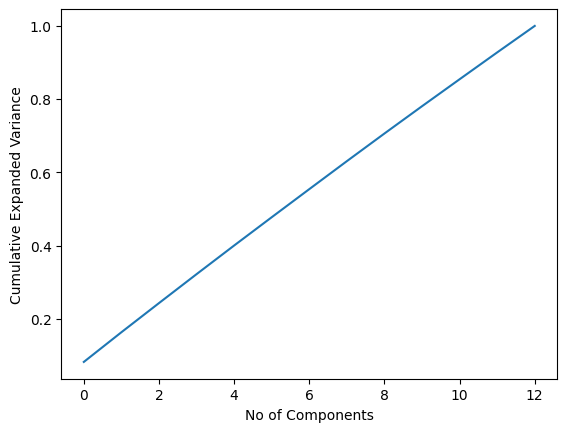

In [47]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of Components")
plt.ylabel("Cumulative Expanded Variance")

pca.explained_variance_ratio_

In [48]:
pca = PCA(n_components=4)

X_pca = pca.fit_transform(X)

X_train,X_test, y_train,y_test = train_test_split(X_pca, y, test_size=0.20,random_state=0)

In [49]:
# Display the components
pca.components_

array([[ 0.51679811,  0.16252905,  0.21046024, -0.05346705, -0.46144069,
         0.02095439, -0.04885926,  0.33831704, -0.09962008,  0.15135336,
         0.05921447, -0.36418128,  0.40021641],
       [-0.17245039,  0.61145921,  0.20136781,  0.26218626, -0.17780917,
        -0.3411007 , -0.02392062, -0.10973162, -0.00697488, -0.27730689,
         0.2192114 ,  0.38639058,  0.22849458],
       [ 0.25566239,  0.07124306, -0.15911565, -0.22066993, -0.02464168,
        -0.19854055, -0.49070638,  0.25581195,  0.40859792, -0.48453866,
        -0.17569169,  0.01258643, -0.27664803],
       [-0.22537144, -0.31253228,  0.40364659,  0.20980316, -0.33230367,
        -0.40153969, -0.31590924,  0.01897857, -0.24948096,  0.14579487,
        -0.01061745, -0.12840885, -0.41553124]])

## Random Forest

# Hyper parameter tuning for Random Foreste
- Using GridSearchCV

In [51]:

rf = RandomForestClassifier()
parameters_rf = {"n_estimators" :[100,200,450,500]
                 ,"max_depth" : [10, 7, 15, 12]
                 , "min_samples_split" : [3, 6, 4, 5]}


## Logistic Regression

In [53]:
lr = LogisticRegression()

parameters_lr = {"intercept_scaling":[2,3,4,6]
                 , "random_state" : [30,60,120,140]}


## GaussianNB

In [54]:
gnb = GaussianNB()

parameters_gnb = {"var_smoothing":[2,3,4,6]}


# Voting Classifier

In [55]:
# Create a blank list to append the paramameters

p = []

# Append Random Forest parameters
p.append(parameters_rf)


# Append Logistic Regression parameters
p.append(parameters_lr)


# Append GaussianNB parameters
p.append(parameters_gnb)

# Create a blank list to append classifiers

c = []
# Random Forest Classifier
c.append(rf)

# Random Logistic Regression
c.append(lr)

# Random GaussianNB
c.append(gnb)


# Create a blank list to get the best model
model_selected = []
fig = plt.figure(figsize=(40,10))
for i in range(len(c)):
  print(f"Current model is {c[i]}")
  grid_cv = GridSearchCV(c[i],p[i],n_jobs = -1, cv = 2)
  grid_cv.fit(X_train,y_train)
  y_predict = grid_cv.predict(X_test)
  # Show Confussion Matrix
  # c_matrix =  confusion_matrix(y_test,y_predict)

  # axis = plt.subplot(1,3,i+1)
  # sns.heatmap(c_matrix, annot=True, ax = axis, fmt ='d')
  # axis.set_xlabel('Predicted Lables')
  # axis.set_ylabel('Actual Lables')
  # axis.set_title(f"{c[i]} model Confusion Matrix")
  # axis.xaxis.set_ticklabels(['No Risk', 'Risk'])
  # axis.yaxis.set_ticklabels(['No Risk', 'Risk'])

  model_selected.append(grid_cv.best_estimator_)
  print(f"Best components are \n{grid_cv.best_estimator_}")
  print("___________________________________________________________")


Current model is RandomForestClassifier()
Best components are 
RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=450)
___________________________________________________________
Current model is LogisticRegression()
Best components are 
LogisticRegression(intercept_scaling=2, random_state=30)
___________________________________________________________
Current model is GaussianNB()
Best components are 
GaussianNB(var_smoothing=2)
___________________________________________________________


<Figure size 4000x1000 with 0 Axes>

accuracy = 63.605248146035365


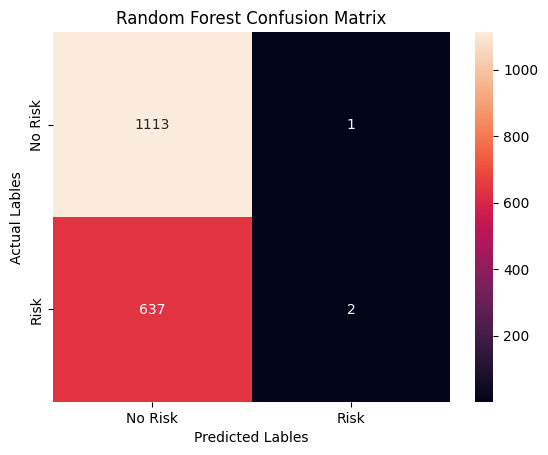

In [56]:
new_rf = RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=500)

new_rf = new_rf.fit(X_train,y_train)

predict_random_forest = new_rf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(predict_random_forest,y_test)
print(f"accuracy = {accuracy*100}")

c_matrix =  confusion_matrix(y_test,predict_random_forest)

axis = plt.subplot(1,1,1)
sns.heatmap(c_matrix, annot=True, ax = axis, fmt ='d')
axis.set_xlabel('Predicted Lables')
axis.set_ylabel('Actual Lables')
axis.set_title("Random Forest Confusion Matrix")
axis.xaxis.set_ticklabels(['No Risk', 'Risk'])
axis.yaxis.set_ticklabels(['No Risk', 'Risk'])
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Predictive Analytics_colab/Project_1/Visualizations/random_forest_matrix.png")


accuracy = 63.54820308043354


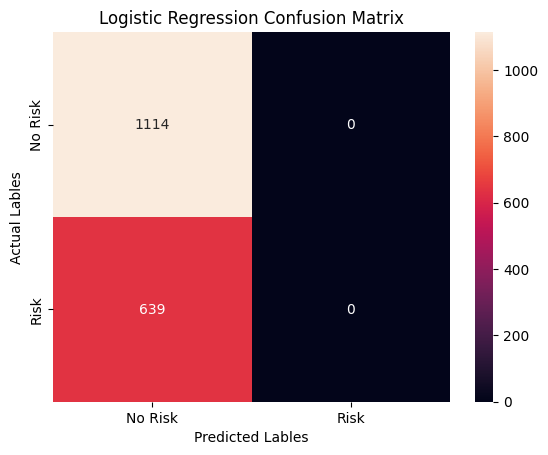

In [57]:
new_lr = LogisticRegression(intercept_scaling=2, random_state=30)

new_lr = new_lr.fit(X_train,y_train)

y_predict = new_lr.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_predict,y_test)
print(f"accuracy = {accuracy*100}")

c_matrix =  confusion_matrix(y_test,y_predict)

axis = plt.subplot(1,1,1)
sns.heatmap(c_matrix, annot=True, ax = axis, fmt ='d')
axis.set_xlabel('Predicted Lables')
axis.set_ylabel('Actual Lables')
axis.set_title("Logistic Regression Confusion Matrix")
axis.xaxis.set_ticklabels(['No Risk', 'Risk'])
axis.yaxis.set_ticklabels(['No Risk', 'Risk'])
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Predictive Analytics_colab/Project_1/Visualizations/logistic_regression_matrix.png")


accuracy = 63.54820308043354


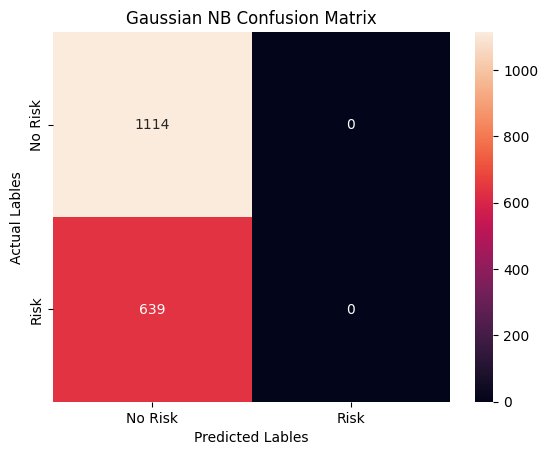

In [58]:
new_gnb = GaussianNB(var_smoothing=2)

new_gnb = new_gnb.fit(X_train,y_train)

y_predict = new_gnb.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_predict,y_test)
print(f"accuracy = {accuracy*100}")

c_matrix =  confusion_matrix(y_test,y_predict)

axis = plt.subplot(1,1,1)
sns.heatmap(c_matrix, annot=True, ax = axis, fmt ='d')
axis.set_xlabel('Predicted Lables')
axis.set_ylabel('Actual Lables')
axis.set_title("Gaussian NB Confusion Matrix")
axis.xaxis.set_ticklabels(['No Risk', 'Risk'])
axis.yaxis.set_ticklabels(['No Risk', 'Risk'])
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Predictive Analytics_colab/Project_1/Visualizations/gaussian_NB_matrix.png")


In [59]:
voting = VotingClassifier(estimators = [('random_forest', model_selected[0])
                                        , ('logistic_regression', model_selected[1])
                                        , ('GaussianNB', model_selected[2])]
                          , voting = 'soft',n_jobs = -1)

voting.fit(X_train, y_train)
voting_predict = voting.predict(X_test)


In [60]:
accuracy_voting = sklearn.metrics.accuracy_score(voting_predict,y_test)
print(f"Voting Classifier Accuracy score = {round(accuracy_voting*100)}")

Voting Classifier Accuracy score = 64
